In [1]:
cd ..

/Users/janperina/projects/masters-thesis


In [2]:
import scipy.stats as stats
import numpy as np  
from traced_v2.models.normal import NormalModel
import glob
from collections import defaultdict
import json
import matplotlib.pyplot as plt

In [3]:
data = []
for file in sorted(glob.glob("data/pic-CSCS_LCG2/*json")):
    with open(file) as f:
        data.append(json.load(f))

In [4]:
rtts = defaultdict(list)
for file in data:
    for hop, rtt in zip(file["hops"], file["rtts"]):
        rtts[hop].append(rtt)

In [6]:
from traced_v2.models.exponential import ExponentialModel

In [7]:
import random
ips = [x for x in rtts if len(rtts[x])>30]

In [62]:
ip =  random.choice(ips)
# ip = '62.40.125.134'


In [63]:
minimum = rtts[ip][0]
shifted = []
for i in rtts[ip]:
    minimum = min(minimum, i)
    shifted.append(i-minimum)


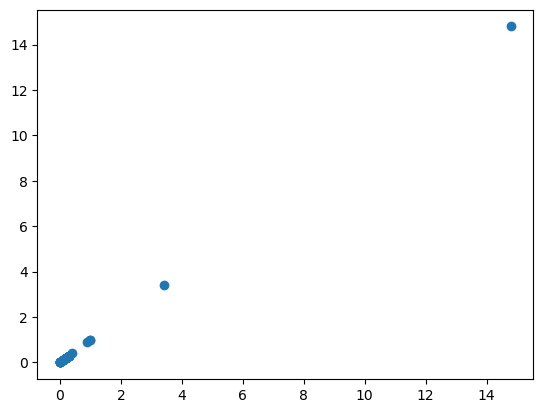

In [64]:
x = np.array(rtts[ip])
plt.scatter(shifted, x-x.min())

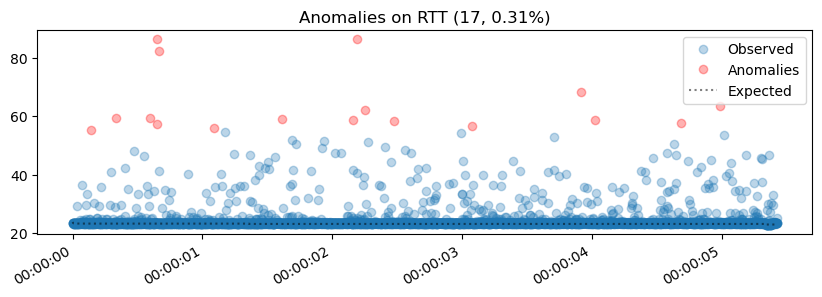

In [60]:
epm = ExponentialModel(1, 1, inherit_beta=True, shift=None, gamma=1, threshold=.25)
for i,t in enumerate(x):
    epm.log(i, t)
fig = plt.figure(figsize=(10, 3))
epm.plot(ax=plt.gca(), label="Exponential Model")

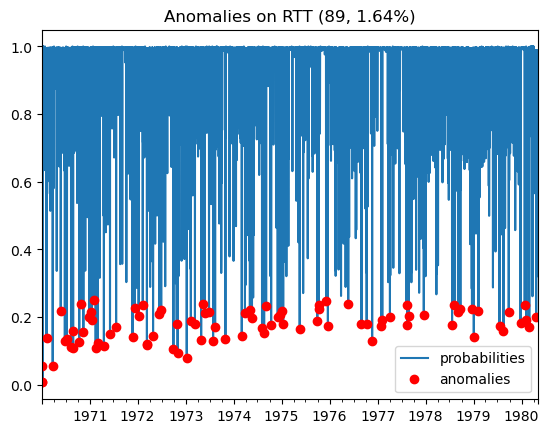

In [56]:
epm.plot_sf_anoms()

In [12]:
tmp = epm.to_frame()

In [14]:
raise Exception("stop here")

Exception: stop here

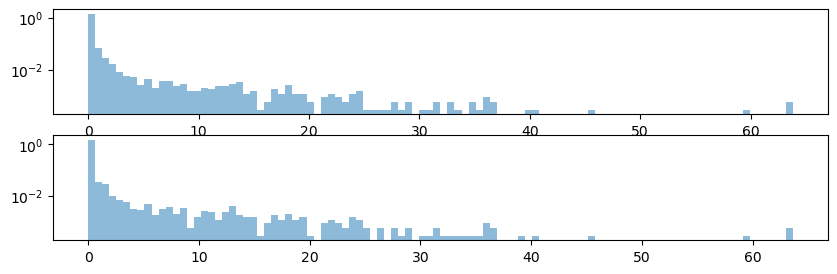

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 3))
ax1.hist(np.array(rtts[ip]) - np.min(rtts[ip]), bins=100, alpha=0.5, label=ip, density=True, log=True);
ax2.hist(shifted, bins=100, alpha=0.5, label=ip, density=True, log=True);

In [18]:
alpha = 1
beta = 1
x = np.array(rtts[ip])
lambdas = []
pdf_global = []
global_error = []
cdf_global = []
error_global = []
for i in x:
    alpha += 1
    beta += i
    lam = alpha/beta

    lambdas.append(lam)
    pdf_global.append(lam * np.exp(-lam * (i- np.min(x))))
    global_error.append(i-np.min(x)-1/lam)
    cdf_global.append(np.exp(-lam * (i- np.min(x))))
    error_global.append(i-(1/lam))

In [19]:
alpha = 1
beta = 1

lambdas_2 = []
pdf_shifted = []

minimum = rtts[ip][0]
shifted_error = []
cdf_shifted = []
error_shifted = []
for i in rtts[ip]:
    minimum = min(minimum, i)
    alpha += 1
    beta += i
    lam = alpha/beta
    lambdas_2.append(lam)
    pdf_shifted.append(lam * np.exp(-lam * (i-minimum)))
    shifted_error.append(i-minimum-1/lam)
    cdf_shifted.append(np.exp(-lam * (i-minimum)))
    error_shifted.append(i-(1/lam))

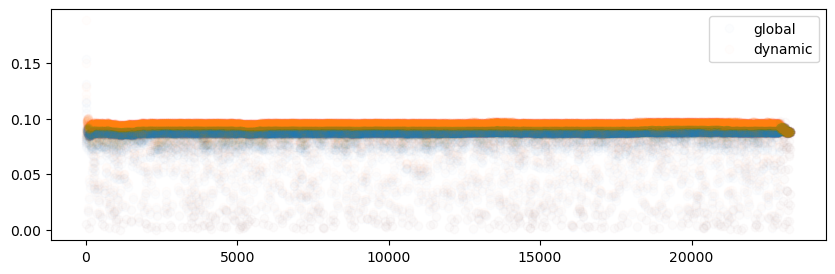

In [21]:
fig = plt.figure(figsize=(10, 3))
plt.plot(pdf_global, label="global", marker='o', linestyle='None', alpha=0.01)
plt.plot(pdf_shifted, label='dynamic', marker='o', linestyle='None', alpha=0.01)
plt.legend()

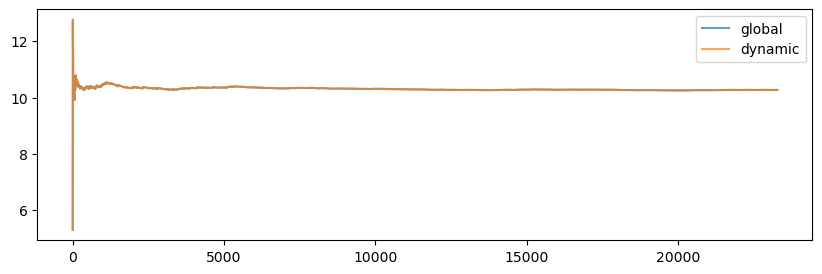

In [34]:
fig = plt.figure(figsize=(10, 3))
plt.plot(1/np.array(lambdas), label="global", alpha=0.7)
plt.plot(1/np.array(lambdas_2), label='dynamic', alpha=0.7)
plt.legend()

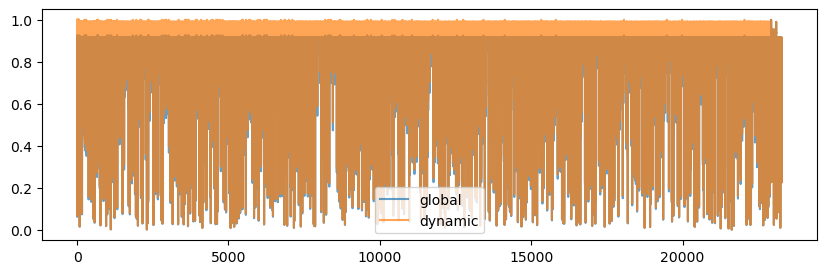

In [32]:
fig = plt.figure(figsize=(10, 3))
plt.plot(cdf_global, label="global", alpha=0.7)
plt.plot(cdf_shifted, label='dynamic', alpha=0.7)
plt.legend()

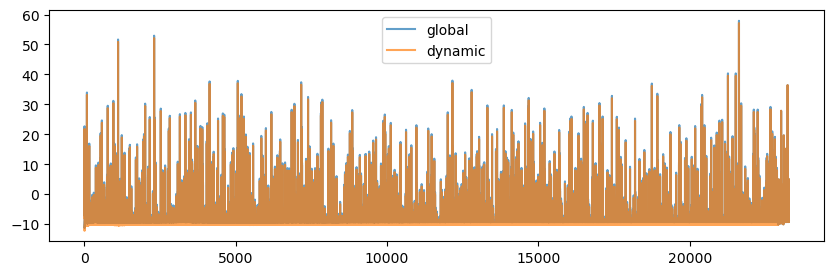

In [30]:
fig = plt.figure(figsize=(10, 3))
plt.plot(global_error, label="global", alpha=0.7)
plt.plot(shifted_error, label='dynamic',alpha=0.7)
plt.legend()

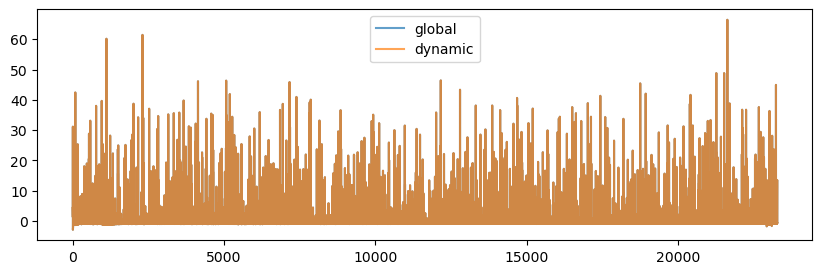

In [31]:
fig = plt.figure(figsize=(10, 3))
plt.plot(error_global, label="global", alpha=0.7)
plt.plot(error_shifted, label='dynamic', alpha=0.7)
plt.legend()